# End-to-end Multi-Class Dog Breed Classfication


This notebook builds an end-to-wnd multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.


## 1.  Problem

Identifying the breed of a dog, given the image of the dog

## 2.  Data

The data was gotten from:
https://www.kaggle.com/c/dog-breed-identification

## 3.  Evaluation

look at the kaggle competition to get the evaluation metrics

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation


## 4.  Features

Some information about the data:
* we are dealing with images(unstructured data) so its probably best we use deep learning/ transfer learning

* there are 120 breeds of dogs
( this means there are 120 different classes)

* there are around 10000+ images in the training set( these images have labels)

* there are around 10000+ images in the test set( these images have no labels, because we have to predict them)

<img src="ML_workflow_ for_ structured_unstructured_data.jpg">

## Get our workspace ready

* Import TensorFlow 2.x---- its the tool to create our pipeline

* Import TensorFlow Hub---- this is where we pick our model

* Make sure we are using a GPU---- GPU is important cos we need more vast numerical computing power as we are running a vast data.. almost a gigabyte worth of data

In [1]:
!pip install tensorflow

In [2]:
# Import Tensorflow 
import tensorflow as tf
print("Tf version:", tf.__version__)

Tf version: 2.5.0


In [3]:
import tensorflow_hub as hub
print("TF Hub version:", hub.__version__)

TF Hub version: 0.12.0


In [4]:
#check for GPU availability
print("GPU", "available (YESSSS!!!!" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU not available :(


In [5]:
# cpu is slower than gpu

# Getting data ready
this means turn data into tensors(pi array, matrix, numerical format ) Turning images into Tensors(numerical representation)

lets start by assessing our data and checking out the labels.

In [6]:
#checkout the labels of our data
import pandas as pd
labels_csv=pd.read_csv("dog-breed-identification\labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     b008606ddfb5f48c2a68891fe861acce  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [7]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<AxesSubplot:>

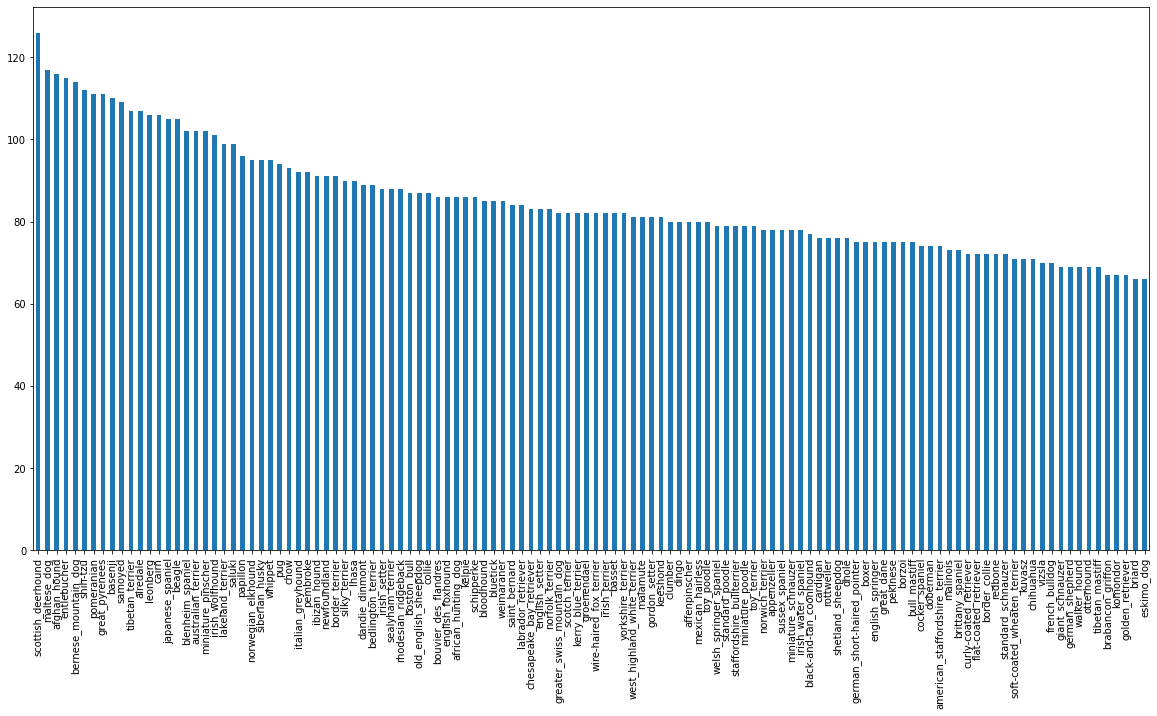

In [8]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [9]:
labels_csv["breed"].value_counts().median()

82.0

In [10]:
# minimum number of images per class is 10, the ml model will do better at predicting than those with few images

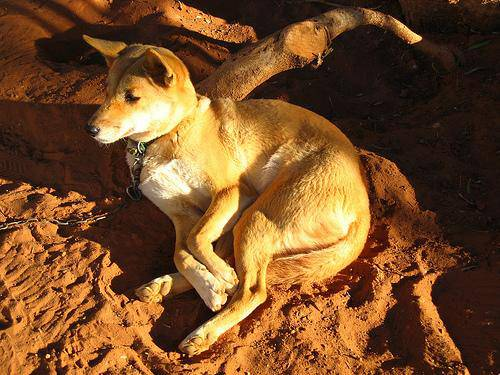

In [11]:
# Lets view an image
from IPython.display import Image
Image("dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

<img src="dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg">

![digan](./dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg)

# Getting images and their labels
lets get a list of all our image file pathnames

In [12]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [13]:
# create pathnames from Image IDs, saving them to a list using list coprehension

filenames=["dog-breed-identification/train/" + fname + ".jpg" for fname in labels_csv["id"]]

In [14]:
# check the first 10 
filenames[:10]

['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [15]:
# Check whether number of filenames match number of actual image files
import os
os.listdir("dog-breed-identification/train/")
# if len(os.listdir("drive/MyDrive/dog-breed-identification/train/"))==len(filenames):
  # print("Filenames match actual amount of files!!! Proceed.")
# else:
  # print("filenames do not match actual amount of files, check the target directory.")  

['000bec180eb18c7604dcecc8fe0dba07.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg',
 '00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '002211c81b498ef88e1b40b9abf84e1d.jpg',
 '00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '002a283a315af96eaea0e28e7163b21b.jpg',
 '003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '0042188c895a2f14ef64a918ed9c7b64.jpg',
 '004396df1acd0f1247b740ca2b14616e.jpg',
 '0067dc3eab0b3c3ef0439477624d85d6.jpg',
 '00693b8bc2470375cc744a6391d397ec.jpg',
 '006cc3ddb9dc1bd827479569fcdc52dc.jpg',
 '0075dc49dab4024d12fafe67074d8a81.jpg',
 '00792e341f3c6eb33663e415d0715370.jpg',
 '007b5a16db9d9ff9d7ad39982703e429.jpg',
 '007b8a07882822475a4ce6581e70b1f8.jpg',
 '007ff9a78eba2aebb558afea3a51c469.jpg',
 '008887054b18ba3c7601792b6a453cc3.jpg',
 '008b1271ed1addaccf93783b39deab45.jpg',
 '008ba178d6dfc1a583617470d19c1673.jpg',
 '009509be3ca7cce0ff9e37c8b09b1125.jpg',
 '0097c6242c6f3071762d9f85c3ef1b2f.jpg',
 '00a338a92e4e7b

In [16]:
# Check whether number of filenames match number of actual image files
import os
# os.listdir("drive/MyDrive/dog-breed-identification/train/")
if len(os.listdir("dog-breed-identification/train/"))==len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("filenames do not match actual amount of files, check the target directory.")  

Filenames match actual amount of files!!! Proceed.


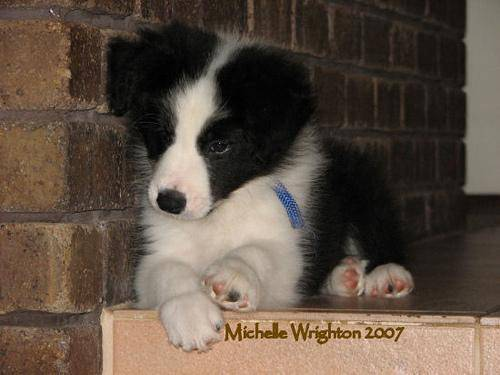

In [17]:
# One more check
Image(filenames[9005])

In [18]:
labels_csv["breed"][9005]

'collie'

### Since we've now got our training image filepaths in a list, lets prepare our labels

In [19]:
import numpy as np
labels=labels_csv["breed"].to_numpy()
# labels=np.array(labels) # does same thing as line 2
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [20]:
len(labels)

10222

In [21]:
#see if number of labels matches the number of filenames
if len(labels)==len(filenames):
    print("Number of labels matches number of filenames!")
else:
    print("Number of labels does not match number of filenames, check data directories!")
    

Number of labels matches number of filenames!


In [22]:
# ml models cant take strings
# find the unique label values cos they are repeated
unique_breeds=np.unique(labels)
unique_breeds


array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [23]:
len(unique_breeds)
# this corresponds to the data on kaggle

120

In [24]:
# Turn a single label into an array if an array of booleans
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [25]:
# Turn every label into a boolean array
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[1:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [26]:
len(boolean_labels)

10222

In [27]:
len(labels)

10222

In [28]:
# Example : Turning array into integers
print(labels[0]) # original label
print(np.where(unique_breeds==labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
#argmax is a function which gives the index of the greatest number in the given row or column and the row or column can be decided using axis attribute of argmax funcion
print(boolean_labels[0].astype(int)) # there will be 1 where the sample label occurs

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [29]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [30]:
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [31]:
filenames[:10]

['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

# creating our own validation set
since the  dataset from Kaggle does not provide a validation set, we will create our own

In [32]:
# Setup X and y variables
X=filenames
y=boolean_labels

In [33]:
len(filenames)

10222

### We are going to start off experimenting with 1000 images and increase as needed

In [34]:
# set number of images to use for experimenting
NUM_IMAGES=1000 #@param {type:"slider",min:1000, max:10000, step:1000}

In [35]:
# lets split our data into train and validation sets
from sklearn.model_selection import train_test_split

# split them into training and validation of total size NUM_IMAGES
X_train, X_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],
                                              y[:NUM_IMAGES],
                                             test_size=0.2,
                                             random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [36]:
#lets have a geez at the training data
X_train[:5],y_train[:2]

(['dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

## Preprocessing images(turning images into Tensors)

1. To preprocess our images into Tensors, we write a function that does a few things

2. Use Tensorflow to read the file and save it to a variable "image"

3. Turn "image" (a jpg) into Tensors

4. Resize the "image" to be a shape of (224,224)

5. Return the modified "image"

## Before we do, lets see what importing an image looks like

In [37]:
#converting images into numpy array
from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape #h, w,color channel(r,g,b pixels(0-255))

(257, 350, 3)

In [38]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [39]:
image.max(), image.min()

(255, 0)

In [40]:
# converting numpy image into tensor
tf.constant(image)[:2] # note that the nos are same as numpy, but its gonna run a lot faster in a gpu than a normal numpy image

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

## Now we have seen what an image looks like as a  Tensor, lets make a function to preprocess them
1. Take an image filepath as input

2. Use Tensorflow to read the file and save it to a variable `image`

3. Turn `image` (a jpg) into Tensors

4. Normalize our image (convert color channel values form 0-255 to 0-1

5. Resize the `image` to be a shape of (224,224)

6. Return the modified `image`


In [41]:
# Define image size
IMG_SIZE=224

# Create a function for preprocessing image
def process_image(image_path, img_size=IMG_SIZE):
    """
    Takes an image file path and an image size and turns the image into a Tensor.
    """
    #Read in an image file
    image=tf.io.read_file(image_path) # takes content and turn into a long tensor codes
    
    # Turn the jpeg image into numerical Tensor with 3 colour channels(R,G,B)
    image=tf.image.decode_jpeg(image,channels=3)
    
    #convert the color channel values from 0-255 to 0-1 values(normalization)
    image=tf.image.convert_image_dtype(image, tf.float32) # it makes computing easy
    
    #resize the image to our desired value
    image=tf.image.resize(image,size=[IMG_SIZE, IMG_SIZE])
    
    return image

In [42]:
tensor=tf.io.read_file(filenames[26])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01w\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

## Turning data into batches

Why turn our data into batches?

lets say you are tyring to process 10000+ images in one go... they all might not fit into memory

So thats y we do about 32(this is the batch size) images at a time(you can manually adjust the batch size if need be)

In order to use tensorflow effectively, we need our data in the form of Tensor tuples which look like this: (image, label)

In [43]:
# Create a simple function to return a tuple (image,label)

def get_image_label(image_path,label):
    """
    Takes an image file path name and the associated label, 
    processes the image and returns a tuple of (image,label)
    """
    image=process_image(image_path)
    return image, label

In [44]:
# Demo of above
(process_image(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

### Now we've got a way to turn data into tuples of Tensors in the form `(image, label)`... lets make a function to turn all of our data (`x` &` y`) into batches!

In [45]:
# Define the batch size, 32 is a good start
BATCH_SIZE=32

#Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Creates batches of data out of image (X) and label (y) pairs
    Shuffles the data if its training data but doesnt shuffle if its validation data
    Also accepts test data as input(no labels)'
    """
    # if the data is a test dataset, we probably dont have labels
    if test_data:
        print("Creating test data batches....")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X))) # creates a dataset out of a tensor.. only filepaths , no labels
        data_batch=data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    
    # if the data is valid dataset, we dont need to shuffle it
    elif valid_data:
        print("Creating validation data batches...")
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepaths
                                                 tf.constant(y))) #labels
        data_batch=data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
                                                
    #if test_data is false as well as valid_data is false,then it becomes a training data
    else:
        print("Creating training data batches....")
        # Turn filepaths and labels into Tensors
        data=tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                tf.constant(y)))
        # shuffling pathnames and labels before mapping... image processor function is faster than shuffling
        data=data.shuffle(buffer_size=len(X))
         #it takes a longer time to shuffle images thanit does to shuffle filename , thats y we shuffle before mapping                                       
        
        # creates (image, label) tuples (this also turns the image path into a preprocessed image)                                       
        data=data.map(get_image_label)
                                                
        # Turn training data into batches
        data_batch=data.batch(BATCH_SIZE)
    return data_batch

In [46]:
# Create training and validation data batches 
train_data=create_data_batches(X_train, y_train)
val_data=create_data_batches(X_val,y_val, valid_data=True)


Creating training data batches....
Creating validation data batches...


In [47]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [48]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

## Visualizing Data Batches

Our data is now in batches, however these can be a little hard to understand/comprehend, lets visualize them

In [49]:
import matplotlib.pyplot as plt

#create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """

  # Setup the figure
  plt.figure(figsize=(10,10))

  #Loop throiugh 25(for displaying 25 images)
  for i in range(25):
    # create subplots(5 rows, 5 columns)
    ax=plt.subplot(5,5,i+1) # rows, columns, index
    #Display an image
    plt.imshow(images[i])
    #Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    #Turn the gridlines off
    plt.axis("off")


In [50]:
unique_breeds[y[0].argmax()]

'boston_bull'

In [51]:
y[0].argmax()

19

In [52]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [57]:
len(train_images), len(train_labels)

(32, 32)

In [54]:
# before plotting train data, unbatch it as it is in a batch.. use an iterator
train_images, train_labels=next(train_data.as_numpy_iterator())
train_images, train_labels# this returns next item from an iterator

(array([[[[4.72793221e-01, 4.93261844e-01, 5.44936597e-01],
          [4.55395609e-01, 5.06726146e-01, 4.64674324e-01],
          [7.37066418e-02, 1.75788417e-01, 4.12486717e-02],
          ...,
          [4.12820935e-01, 3.98882657e-01, 2.44618937e-01],
          [4.06948805e-01, 3.83060634e-01, 2.88566560e-01],
          [2.57559955e-01, 2.31667101e-01, 1.52482927e-01]],
 
         [[4.98720467e-01, 5.17733037e-01, 5.72319865e-01],
          [3.37321162e-01, 3.85553896e-01, 3.53366822e-01],
          [1.45314828e-01, 2.44929686e-01, 1.17548719e-01],
          ...,
          [3.51976395e-01, 3.31044406e-01, 1.64772436e-01],
          [4.61413860e-01, 4.32204783e-01, 3.22890282e-01],
          [3.25213641e-01, 2.93202579e-01, 1.99706271e-01]],
 
         [[4.67881560e-01, 4.91350472e-01, 5.44451833e-01],
          [4.99953002e-01, 5.58992982e-01, 5.23043156e-01],
          [1.06918067e-03, 9.71259028e-02, 3.86405736e-04],
          ...,
          [5.13242841e-01, 4.82246399e-01, 3.0195

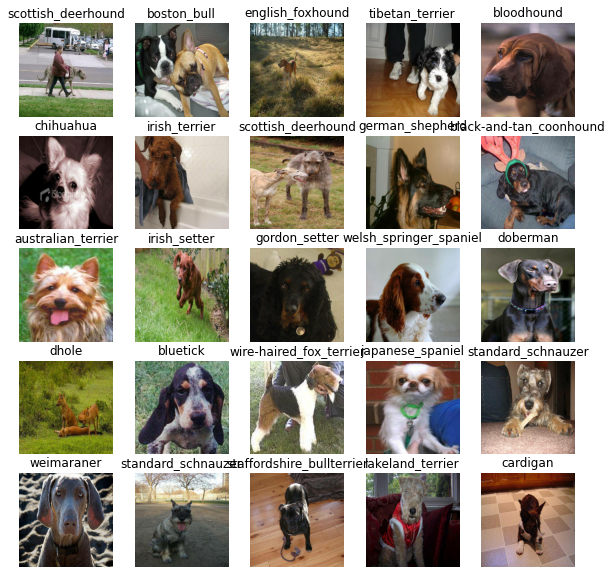

In [55]:
# Now lets visulaize the data
show_25_images(train_images,train_labels)

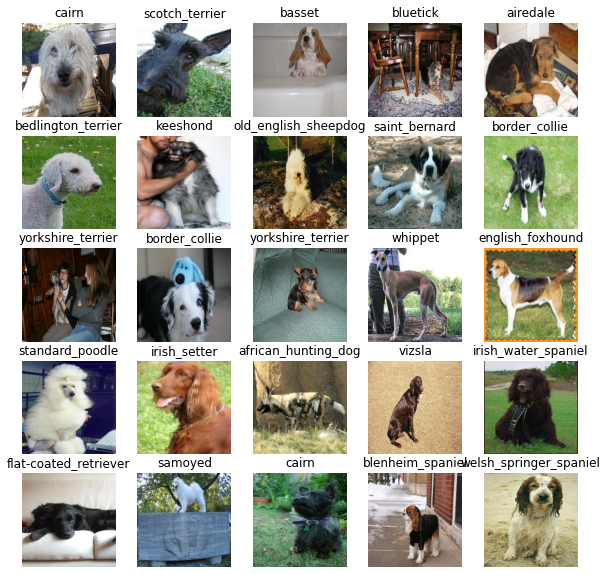

In [56]:
val_images, val_labels=next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

<img src="../images/ML_Model.JPG">

## Building a model

Before we build a model, there are a few things we need to define:
 * the input shape(our images shape in the form of tensors) to our model
 * the output shape(image labels, in the form of tensors)of our model
 * the URL of the model we want to use from TensorFlow Hub( we will use transfer learning instead of building a model from scratch)
 https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
 
 TensorFlow, Pytorch, model zoo, paperswithcode, are deep learning frameworks
 
 TensorFlowHub is a lib for publication, discovery and consumption of reusable parts of ml models. 
 
 Transfer learning can
  * train a model with smaller dataset
  * imrove generalization
  * speed up training
  
  tf.keras is Tensorflow high level API for building and training deep learning models
  useful for fast prototyping, state-of-the-art research and production
  it is user friendly, modular and composable, easy to extend

In [58]:
IMG_SIZE

224

In [59]:
# Setup input shape to the model
INPUT_SHAPE=[None, IMG_SIZE, IMG_SIZE, 3 ] # batch, height, width, color channels

#Setup output shape of our model
OUTPUT_SHAPE=len(unique_breeds)

#setup model URL from Tensorflow Hub
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

### Now we've got inputs, outputs and model ready to go. Lets put them together into a Keras deep learning model!

Knowing this. lets create a function which:
    
    * Takes the input shape, output shape and the model we've chosen as parameters
    
    * defines the layers in  a keras model in sequential fashion (do this first, then this, then that)
    
    * compiles the model(says how it should be evaluated and improved)
     
     * builds the model(tells the model the input shape it will be getting)
     
     * returns the model
        
All of these steps can be founs here: https://www.tensorflow.org/guide/keras/overview

<img src="../images/Capture1.JPG">

In [60]:
# create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    """
    builds a keras sequential model from the one we downloaded from TensorHub, converts input to right form and processes it
    """
    
    print("Building model with ", MODEL_URL)
    
    # Setup the model layers
    model=tf.keras.Sequential([# linear stack of layers--takes some inputs find patterns then give an outpu
      hub.KerasLayer(MODEL_URL), # layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE, # default shape for this model is 1280, but this prints in the shape of the label
                                activation="softmax") # layer 2 (output layer) # this makes components add up to 1,,, sigmoid is used for binary classification
    ])
    
    # compile the model
    model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # model wants to minimize the loss, make it zero... its a measure of how well the model is guessing when predicting... high loss, worse model
      optimizer=tf.keras.optimizers.Adam(), # helps u lower the loss function,, base instruction on what u've done so far.. adam is a general optimizer, there are others
      metrics=["accuracy"]) # a way of evaluating the guesses after the model is trained... accuracy is default for classification, there are a whole lot
    
    # Build the model
    model.build(INPUT_SHAPE) # build model based on ur input shape, the default shape this model is built on
    
    return model

In [61]:
model=create_model()
model.summary()

Building model with  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [62]:
outputs=np.ones(shape=(1,1,1280))
outputs

array([[[1., 1., 1., ..., 1., 1., 1.]]])

In [63]:
# deep learnig,, each layers are small models that run deep in the layers...transfer learning helps save computing power

## Creating Callbacks

callbacks are helper functions our model can use during training to do things like:
 * save the progress
 * check its progress
 * stop training early if a model stops improving....


We will create two callbacks

1. one for TensorBoard which helps track our models progress 

2, and an early stopping callback which prevents our model from training too long


## TensorBoard CallBack

To setup a TensorBoaord callback, we need to do 3 things

1. Load the TensorBoard notebook extension

2. Create a TensorBoard callback which is able to save logs to a directory and pass it our models 'fit()' function

3. Visaulize our models training logs with the '%tensorboard magic function (we will do this after model training)

In [64]:
# Load TensorBoard notebook extension
%load_ext tensorboard


In [65]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
    # Create a log directory for storing TensorBoard logs 
    logdir=os.path.join("dog-breed-identification/logs", # to have access to the path of the log file
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

### EARLY STOPPING CALLBACK

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving


https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping


In [66]:
#create early stopping callback
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", # monitor by defaults checks for val-loss
                                                patience=3) # no of epochs with no improvement after training has been stopped

## Training a model (on subset of data)

our first model is only going to train on 1000 images to make sure everything is working... to prevent a break in codes

Number of epochs is how many passes we want our model to do

pass is our model finding patterns in our images and finding out which label belongs to which image


In [67]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100}

In [68]:
# check to make sure we are still running on a gpu

print("GPU", "available (YESSSS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU not available :(


lets create a function which trains a model.

* Create a model using "create_model()"

* Setup a TensorBoard callback using "create_tensorboard_callback()"

* Call the "fit()" function on our model passing it in training data, validsation data, number of epochs to train for ("NUM_EPOCHS") and the callbacks we will like to use

* Return the model

In [69]:
# Build a function to train and return a trained model
def train_model():
    """
    Trains a given model and returns the trained version
    """
    
    # create a model
    model=create_model()
    
    # create new TensorBoard session evrytime we train a model
    tensorboard=create_tensorboard_callback()
     
    # fit the model to the data passing it the callbacks we created
    model.fit(x=train_data,
              epochs = NUM_EPOCHS, # chances our model has to pass over the training data to find patterns
              validation_data=val_data,
              validation_freq=1, # how often we want to test the patterns the model has found on the valudation data 
              callbacks=[tensorboard, early_stopping])
            
     # Return the fitted model
    return model


In [70]:
# Fit the model to the data
model=train_model()

# for the first time note that the first epoch will take the longest time cos we initialize at first, load data into the gpu

Building model with  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 238s 9s/step - loss: 4.5125 - accuracy: 0.0950 - val_loss: 3.4207 - val_accuracy: 0.2400
Epoch 2/100
25/25 [==============================] - 138s 6s/step - loss: 1.5699 - accuracy: 0.7113 - val_loss: 2.1873 - val_accuracy: 0.4550
Epoch 3/100
25/25 [==============================] - 133s 5s/step - loss: 0.5316 - accuracy: 0.9563 - val_loss: 1.7128 - val_accuracy: 0.5450
Epoch 4/100
25/25 [==============================] - 142s 6s/step - loss: 0.2443 - accuracy: 0.9925 - val_loss: 1.5204 - val_accuracy: 0.5900
Epoch 5/100
25/25 [==============================] - 149s 6s/step - loss: 0.1383 - accuracy: 0.9987 - val_loss: 1.4546 - val_accuracy: 0.6200
Epoch 6/100
25/25 [==============================] - 152s 6s/step - loss: 0.0958 - accuracy: 0.9987 - val_loss: 1.4130 - val_accuracy: 0.6100
Epoch 7/100
25/25 [==============================] - 13

In [71]:
# note that we didnt get to 100 epochs, this is most likely because accuracy for the validatii set stops improving for a number of epochs
# model performs at 100 % on the training set.. the model is overfitting cos it is performig better on the training data than on the validation data

**Question**
it looks like our model is overfitting, what are some ways to prevent model overfitting in deep learning neural networks?

**Note** that overfitting is a sign that the model is working, its a good sign to begin with

## Checking the TensorBoard logs
The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize its content

In [72]:
%tensorboard --logdir dog-breed-identification/logs/

Reusing TensorBoard on port 6006 (pid 12004), started 4 days, 0:38:12 ago. (Use '!kill 12004' to kill it.)

## Making and evaluating predictions using a trained model

In [73]:
# Make predictions on the validation data(not used to train on)
predictions = model.predict(val_data, verbose=1) #verbose means show me ur progress as u predict
predictions

7/7 [==============================] - 49s 7s/step


array([[5.4195739e-04, 1.9961355e-04, 1.0353534e-03, ..., 4.1569388e-04,
        2.9428809e-05, 8.8464189e-04],
       [3.5063931e-04, 5.8933039e-04, 2.7446613e-02, ..., 1.9632763e-04,
        6.6640682e-04, 2.7793989e-04],
       [7.8500079e-07, 7.6685037e-06, 1.3023402e-04, ..., 5.7173245e-05,
        2.0622942e-05, 7.7466357e-05],
       ...,
       [1.3770273e-05, 7.8359364e-05, 1.4622065e-05, ..., 5.3679237e-06,
        1.6337569e-04, 4.4072858e-05],
       [9.1397372e-04, 7.1998173e-04, 3.2810427e-04, ..., 2.0622867e-04,
        3.0145200e-04, 2.5019057e-03],
       [1.6251097e-03, 8.4274961e-06, 5.8284006e-03, ..., 1.7120847e-03,
        2.5805952e-03, 2.5778696e-05]], dtype=float32)

In [74]:
predictions.shape

(200, 120)

In [75]:
len(y_val)

200

In [76]:
len(unique_breeds)

120

In [77]:
len(predictions[0])

120

In [78]:
np.sum(predictions[0]) # this tallies to requirements when using softmax in ur model)

1.0000001

In [79]:
np.sum(predictions[1])

1.0

In [80]:
# First prediction
index=0
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"sum:{np.sum(predictions[index])}")
print(f"Max index:{np.argmax(predictions[index])}")
print(f"predicted labels: {unique_breeds[np.argmax(predictions[index])]}")


[5.41957386e-04 1.99613554e-04 1.03535340e-03 8.60440705e-05
 1.49664422e-03 9.66642037e-05 1.34318089e-02 3.45954148e-04
 9.95442315e-05 6.04919856e-04 7.96164386e-04 6.25111206e-05
 1.28074782e-04 1.67468388e-05 3.30830953e-04 1.68141647e-04
 8.10807687e-05 8.97251740e-02 6.19096536e-05 5.09862366e-05
 7.55880203e-04 9.31201095e-04 5.09281126e-05 6.03320496e-03
 3.31856318e-05 4.99404036e-04 3.94890159e-01 3.96704010e-04
 3.49233393e-04 7.59489121e-05 8.00072448e-05 8.87606759e-04
 4.79730428e-04 1.85110315e-04 2.31703780e-05 2.49936786e-02
 1.84453093e-05 3.22293170e-04 2.94778529e-05 3.78443583e-05
 3.90142901e-03 7.10129389e-05 8.88997747e-05 8.26662173e-04
 2.26841462e-06 2.42266964e-04 9.05325651e-05 6.49607508e-04
 1.34619579e-04 1.43345329e-04 1.18813536e-04 8.79307481e-06
 1.51360902e-04 1.99288679e-05 1.17411291e-04 2.55420200e-05
 5.88804432e-05 5.18381968e-03 1.02249563e-04 9.66881886e-02
 5.57208405e-05 1.80026873e-05 1.33884489e-03 8.19621491e-05
 1.11771580e-04 2.033220

In [81]:
unique_breeds[39]

'english_foxhound'

In [82]:
unique_breeds[26]

'cairn'

In [83]:
unique_breeds[113]

'walker_hound'

 **Note** prediction prob is also called confidence level

### Having the above functionality is great but we want to be able to do it at scale

#### and it would be even better if we could see the image the prediction is being made on!

**TIDBIT** one of the important steps expected of a data scientist or ml is being able to **evaluate** a model  

In [84]:
# turn probs into their respective labels (easier to understand)
def get_pred_label(prediction_probabilities):
    """
    Turns an array of prediction probabilities into a label.
    """
    return unique_breeds[np.argmax(prediction_probabilities)]

# get a predicted label based on an array of prediction probabilities
pred_label=get_pred_label(predictions[81])
pred_label

'irish_terrier'

In [85]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

Now since our validation data is still i a batch dataset, we will have to unbatchify it to make predictions to the validation labels(truth labels)

In [86]:
# create a function to unbatch a batch dataset
def unbatchify(data):
    """
    Takes a batched dataset of (image, label) Tensors and returns separate arrays
    of images and labels.
    """
    images =[]
    labels =[]

# loop through unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
      images.append(image)
      labels.append(unique_breeds[np.argmax(label)])
    return images,labels


#unbatchify the validation data
val_images, val_labels=unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [87]:
get_pred_label(labels[0])

'affenpinscher'

In [88]:
get_pred_label(predictions[0])

'cairn'

In [89]:
get_pred_label(val_labels)

'bedlington_terrier'

Now we've got ways to get:
 * Prediction labels
 * Validation labels(truth labels)
 * Validation images

Lets make some function to make these all a bit more visualze

We will create a function which:
 * Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer
  * Convert the prediction probabs to a  predicted label
  * Plot the predicted label, its predicted probability, the truth label and the target image on a single plot

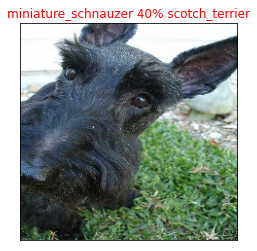

In [90]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
    view the prediction, ground truth and image for sample n
    """
    pred_prob, true_label, image=prediction_probabilities[n], labels[n], images[n]

    # get the pred label
    pred_label=get_pred_label(pred_prob)

    # plot image and remove ticks
    plt.imshow(image) 
    plt.xticks([])
    plt.yticks([])
    
    #change the color of the title depending on if the prediction is right or wrong
    if pred_label==true_label:
        color="green"
    else:
        color="red"

    #change plot title to be predicted, probability of prediction and truth label
    plt.title("{} {:2.0f}% {}".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)
plot_pred(prediction_probabilities=predictions,
              labels=val_labels,
              images=val_images
              )

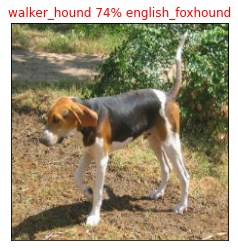

In [91]:
plot_pred(prediction_probabilities=predictions,
              labels=val_labels,
              images=val_images,
              n=42)

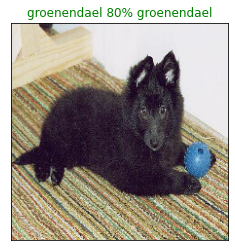

In [92]:
plot_pred(prediction_probabilities=predictions,
              labels=val_labels,
              images=val_images,
              n=77)

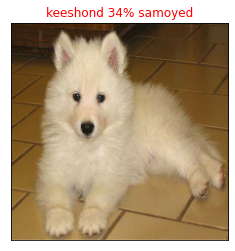

In [93]:
plot_pred(prediction_probabilities=predictions,
              labels=val_labels,
              images=val_images,
              n=142)

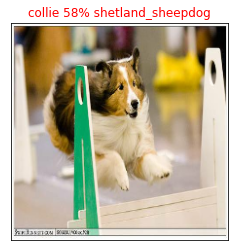

In [94]:
plot_pred(prediction_probabilities=predictions,
              labels=val_labels,
              images=val_images,
              n=196)

Now we've got one function to visualize our models top prediction, lets make another to view our models top 10 predictions


This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * prediction labels
* plot the top 10 prediction probability values and labels, coloring the true label green




 

In [95]:
predictions[0]

array([5.41957386e-04, 1.99613554e-04, 1.03535340e-03, 8.60440705e-05,
       1.49664422e-03, 9.66642037e-05, 1.34318089e-02, 3.45954148e-04,
       9.95442315e-05, 6.04919856e-04, 7.96164386e-04, 6.25111206e-05,
       1.28074782e-04, 1.67468388e-05, 3.30830953e-04, 1.68141647e-04,
       8.10807687e-05, 8.97251740e-02, 6.19096536e-05, 5.09862366e-05,
       7.55880203e-04, 9.31201095e-04, 5.09281126e-05, 6.03320496e-03,
       3.31856318e-05, 4.99404036e-04, 3.94890159e-01, 3.96704010e-04,
       3.49233393e-04, 7.59489121e-05, 8.00072448e-05, 8.87606759e-04,
       4.79730428e-04, 1.85110315e-04, 2.31703780e-05, 2.49936786e-02,
       1.84453093e-05, 3.22293170e-04, 2.94778529e-05, 3.78443583e-05,
       3.90142901e-03, 7.10129389e-05, 8.88997747e-05, 8.26662173e-04,
       2.26841462e-06, 2.42266964e-04, 9.05325651e-05, 6.49607508e-04,
       1.34619579e-04, 1.43345329e-04, 1.18813536e-04, 8.79307481e-06,
       1.51360902e-04, 1.99288679e-05, 1.17411291e-04, 2.55420200e-05,
      

In [96]:
predictions[0].argsort() # order of index that will sort the array, is the highest value is in position 1

array([ 44,  51, 112,  92,  13,  61,  36,  99,  53,  34,  55, 108, 118,
        38,  24,  39,  69, 107,  22,  19,  94,  60, 113, 115,  56,  18,
        11, 114,  75,  41, 101,  29,  30,  16,  91,  63,   3,  42,  46,
         5,   8,  58,  86,  72,  67,  64, 111,  54,  50,  88,  12,  48,
        49,  52,  15,  84,  33, 104,   1,  74,  82,  45,  71,  96, 110,
        85,  37,  14,   7,  28,  27, 117,  32,  25,  80,   0,  89,   9,
        87,  47, 116,  78,  66,  20,  10,  43, 119,  31,  21, 105,   2,
        95,  98,  97,  62,  93,   4,  90, 100, 106,  77,  40,  81,  57,
        76,  23,  79,  83,  68,   6, 109,  65,  35,  70,  73, 102,  17,
        59, 103,  26], dtype=int64)

In [97]:
predictions[0].argsort()[-10:] # top ten indexes

array([109,  65,  35,  70,  73, 102,  17,  59, 103,  26], dtype=int64)

In [98]:
predictions[0].argsort()[-10:][::-1] # top ten values of prediction 0

array([ 26, 103,  59,  17, 102,  73,  70,  35,  65, 109], dtype=int64)

In [99]:
predictions[0][predictions[0].argsort()[-10:][::-1]] 

array([0.39489016, 0.09906168, 0.09668819, 0.08972517, 0.07665358,
       0.03916577, 0.02826017, 0.02499368, 0.0203322 , 0.01853355],
      dtype=float32)

In [100]:
predictions[0].max()

0.39489016

In [101]:
unique_breeds[predictions[0].argsort()[-10:][::-1]]

array(['cairn', 'soft-coated_wheaten_terrier', 'irish_wolfhound',
       'border_terrier', 'silky_terrier', 'maltese_dog', 'lhasa',
       'dandie_dinmont', 'komondor', 'tibetan_terrier'], dtype=object)

In [102]:
def plot_pred_conf(prediction_probabilities,labels,n=1):
  """
  plus the top 10 highest prediction confidence along with the truth label for sample n
  """
  pred_prob, true_label=prediction_probabilities[n], labels[n]

  # get the predicted label
  pred_label=get_pred_label(pred_prob)

  #find the top 10 prediction confidence indexes
  top_10_pred_indexes=pred_prob.argsort()[-10:][::-1] # in descending order

  #find the top 10 prediction confidence values
  top_10_pred_values=pred_prob[top_10_pred_indexes]

  #find the top 10 prediction labels
  top_10_pred_labels=unique_breeds[top_10_pred_indexes]

  #setup plot
  top_plot=plt.bar(np.arange(len(top_10_pred_labels)),
                   top_10_pred_values,
                   color="grey")
  
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical") #cos of the xticks

  #change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")     
  else:
    pass

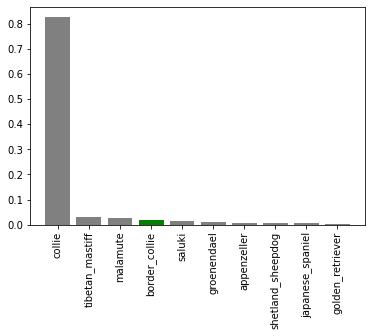

In [103]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we've got some functions to help us visualize our predictions and evaluate our model, lets check out a few


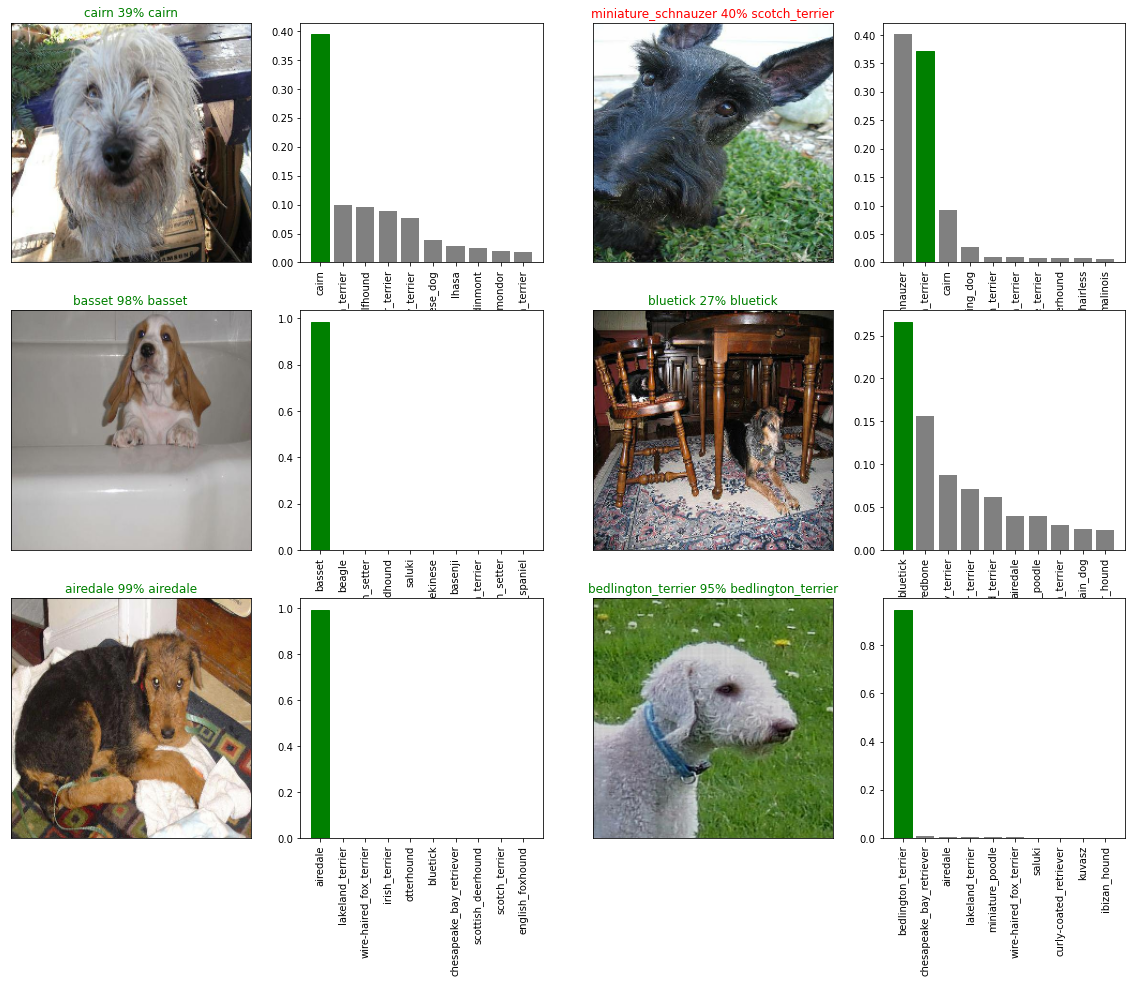

In [104]:
# Lets check out a few predictions and their different values
i_multiplier=0
num_rows=3
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows)) 
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
  # plt.tight_layout(h_pad=1.0 if ur plots isnt showimg well)
plt.show()


**Challenge** : how would u create a confusion matrix with our models predictions and true labels?

## Saving and Reloading a trained model

In [105]:
# create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix(string).
  """
  #  create a model directory pathname with current time
  modeldir=os.path.join("dog-breed-identification/models",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path=modeldir + "-" + suffix + ".h5" # save format of a model, model extension
  print(f"saving model to: {model_path}....")
  model.save(model_path)
  return model_path

In [106]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model=tf.keras.models.load_model(model_path,
                                   custom_objects={"KerasLayer":hub.KerasLayer})
  return model

Now we've got functions to save and load a trained model, let's make sure they work!

In [107]:
#save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

saving model to: dog-breed-identification/models\20210628-101902-1000-images-mobilenetv2-Adam.h5....


'dog-breed-identification/models\\20210628-101902-1000-images-mobilenetv2-Adam.h5'

## Load a trained model


In [108]:
loaded_1000_image_model=load_model('dog-breed-identification/models\\20210628-101902-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: dog-breed-identification/models\20210628-101902-1000-images-mobilenetv2-Adam.h5


In [109]:
# Evaluate the pre saved model
model.evaluate(val_data)

7/7 [==============================] - 35s 5s/step - loss: 1.2897 - accuracy: 0.6450


[1.2897427082061768, 0.6449999809265137]

In [110]:
# evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 45s 6s/step - loss: 1.2897 - accuracy: 0.6450


[1.2897427082061768, 0.6449999809265137]

### Training a big dog model (on the full data)

In [111]:
len(X), len(y) # filepaths, labels

(10222, 10222)

In [112]:
X[:10]

['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [113]:
y[:10]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [114]:
# create a data batch with the full dataset
full_data=create_data_batches(X,y)

Creating training data batches....


In [115]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [116]:
# create a model for full data
full_model=create_model()

Building model with  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [117]:
# create full model callbacks
full_model_tensorboard=create_tensorboard_callback()
# no validation set when training on all the data, so we cant monitor validation accuracy
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                          patience=3)

**NOTE** Running the cell below will take a little while(30 minutes or longer for the first epochs) because the CPU we are using in the runtime has to load all of the images into memory.

**ALSO NOTE** all of these steps were performed on a fraction of the data in the cells above to be certain the model works fine before trying it on the full dataset

In [118]:
# fit the full mode to the full data
full_model.fit(x=full_data,
              epochs=NUM_EPOCHS,
              callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 2362s 7s/step - loss: 1.3392 - accuracy: 0.6684
Epoch 2/100
320/320 [==============================] - 2173s 7s/step - loss: 0.3987 - accuracy: 0.8822
Epoch 3/100
320/320 [==============================] - 2051s 6s/step - loss: 0.2348 - accuracy: 0.9343
Epoch 4/100
320/320 [==============================] - 1961s 6s/step - loss: 0.1541 - accuracy: 0.9625
Epoch 5/100
320/320 [==============================] - 1725s 5s/step - loss: 0.1054 - accuracy: 0.9776
Epoch 6/100
320/320 [==============================] - 1886s 6s/step - loss: 0.0776 - accuracy: 0.9875
Epoch 7/100
320/320 [==============================] - 1946s 6s/step - loss: 0.0594 - accuracy: 0.9919
Epoch 8/100
320/320 [==============================] - 1887s 6s/step - loss: 0.0462 - accuracy: 0.9947
Epoch 9/100
320/320 [==============================] - 1817s 6s/step - loss: 0.0374 - accuracy: 0.9961
Epoch 10/100
320/320 [==============================] - 1808s 6s/step - l

In [119]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

saving model to: dog-breed-identification/models\20210628-213032-full-image-set-mobilenetv2-Adam.h5....


'dog-breed-identification/models\\20210628-213032-full-image-set-mobilenetv2-Adam.h5'

In [121]:
# loading the full model
loaded_full_model=load_model('dog-breed-identification/models\\20210628-213032-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: dog-breed-identification/models\20210628-213032-full-image-set-mobilenetv2-Adam.h5


### Making predictions on the test dataset

since our model has been trained on images in the firm of Tensor batches, we would have to het the test data in the same format to make predictions


Luckily, we created `create_data_batches` earlier ehich can take a list of filenames as input and convert them into Tensor batches

To make predictions on the test data, we will:
    * Get the test image filename
    * convert the filenames into test data batches using `create_data_batches()` and setting the `test-data` parameter to `True`(since the test data does not have labels)
    * Make a predictions array by passing the test batches to the `predict()` method called on our model

In [122]:
# Load test image filenames
test_path="dog-breed-identification/test/"
test_filenames=[test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['dog-breed-identification/test/000621fb3cbb32d8935728e48679680e.jpg',
 'dog-breed-identification/test/00102ee9d8eb90812350685311fe5890.jpg',
 'dog-breed-identification/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'dog-breed-identification/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'dog-breed-identification/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'dog-breed-identification/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'dog-breed-identification/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'dog-breed-identification/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'dog-breed-identification/test/002f80396f1e3db687c5932d7978b196.jpg',
 'dog-breed-identification/test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [123]:
len(test_filenames)

10357

In [124]:
# Create test data batch
test_data=create_data_batches(test_filenames, test_data=True)

Creating test data batches....


In [125]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

**NOTES** Calling `predict()` on our full model nd passing it the test data batch will take a long time to run(about ~ an hour).

this is because its running a large new models, find patterns and still create predictions


it will run 10357/32 ~ 324 batches

In [126]:
# Make predictions on test data batch using the loaded full model
test_predictions=loaded_full_model.predict(test_data,
                                            verbose=1)

324/324 [==============================] - 1313s 4s/step


In [127]:
# Save predictions (NumPy array) to csv file for access later
np.savetxt("dog-breed-identification/preds_array.csv", test_predictions, delimiter=",")

In [129]:
# Load predictions (NumPy array) from csv file
test_predictions=np.loadtxt("dog-breed-identification/preds_array.csv", delimiter=",")

In [130]:
test_predictions[:10]

array([[7.77427688e-12, 1.79790720e-12, 1.09961402e-14, ...,
        9.50570020e-15, 2.70502620e-10, 3.72146888e-12],
       [7.33191882e-06, 1.91727668e-06, 8.58383373e-08, ...,
        1.92536806e-10, 2.07305746e-07, 1.16483889e-09],
       [1.31292824e-10, 1.51334768e-06, 6.89445345e-09, ...,
        1.34365919e-07, 7.03072253e-11, 1.39001683e-11],
       ...,
       [4.16230472e-09, 1.74344247e-10, 2.56969640e-10, ...,
        7.92406505e-12, 6.31474864e-12, 7.46100334e-11],
       [5.00840645e-12, 2.17790341e-10, 8.94126925e-11, ...,
        4.77165010e-08, 3.73341080e-10, 7.01025306e-12],
       [1.40073797e-09, 2.36470930e-11, 1.02943647e-10, ...,
        1.31530507e-12, 1.18482151e-11, 1.15092913e-08]])

In [131]:
test_predictions.shape

(10357, 120)

Preparing test dataset predictions for submission

Looking at the submission format, we need an id column and a column for each dog breed.. in a csv

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation


To get the data in this format, we will:

* create a pandas dataframe with am id column, as well as a column for each dog breed 

* add data to the id column by extracting the test image ids from their filepaths

* add data (prediction probabilities) to each of the dog breed columns

* export dataframe as a csv for submission


In [132]:
list(unique_breeds)

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [133]:
["id"]+list(unique_breeds)

['id',
 'affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenen

In [134]:
# Create a pandas dataframe with empty columns
preds_df=pd.DataFrame(columns=["id"]+ list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [135]:
test_filenames

['dog-breed-identification/test/000621fb3cbb32d8935728e48679680e.jpg',
 'dog-breed-identification/test/00102ee9d8eb90812350685311fe5890.jpg',
 'dog-breed-identification/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'dog-breed-identification/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'dog-breed-identification/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'dog-breed-identification/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'dog-breed-identification/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'dog-breed-identification/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'dog-breed-identification/test/002f80396f1e3db687c5932d7978b196.jpg',
 'dog-breed-identification/test/0036c6bcec6031be9e62a257b1c3c442.jpg',
 'dog-breed-identification/test/0041940322116ae58c38130f5a6f71f9.jpg',
 'dog-breed-identification/test/0042d6bf3e5f3700865886db32689436.jpg',
 'dog-breed-identification/test/004476c96f575879af4af471af65cae8.jpg',
 'dog-breed-identification/test/00485d47de966a9437ad3b33ac193b6f.jpg',
 'dog-

In [136]:
test_path

'dog-breed-identification/test/'

In [137]:
os.path.splitext(test_filenames[0])

('dog-breed-identification/test/000621fb3cbb32d8935728e48679680e', '.jpg')

In [138]:
# append test image IDS to preds_df
test_ids=[os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"]=test_ids

In [139]:
preds_df.head()

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e           NaN          NaN   
1  00102ee9d8eb90812350685311fe5890           NaN          NaN   
2  0012a730dfa437f5f3613fb75efcd4ce           NaN          NaN   
3  001510bc8570bbeee98c8d80c8a95ec1           NaN          NaN   
4  001a5f3114548acdefa3d4da05474c2e           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [140]:
# add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)]=test_predictions
preds_df.head()

id affenpinscher afghan_hound  \
0  000621fb3cbb32d8935728e48679680e           0.0          0.0   
1  00102ee9d8eb90812350685311fe5890      0.000007     0.000002   
2  0012a730dfa437f5f3613fb75efcd4ce           0.0     0.000002   
3  001510bc8570bbeee98c8d80c8a95ec1      0.000027          0.0   
4  001a5f3114548acdefa3d4da05474c2e      0.000086     0.000008   

  african_hunting_dog  airedale american_staffordshire_terrier appenzeller  \
0                 0.0       0.0                            0.0         0.0   
1                 0.0       0.0                       0.000003         0.0   
2                 0.0       0.0                            0.0         0.0   
3            0.000004  0.000004                        0.00002         0.0   
4                 0.0       0.0                            0.0         0.0   

  australian_terrier   basenji basset  ... toy_poodle toy_terrier    vizsla  \
0                0.0       0.0    0.0  ...        0.0         0.0       0.0   
1           0.000002  0.000001    0.0  ...        0.0    0.000004       0.0   
2                0.0       0.0    0.0  ...        0.0         0.0       0.0   
3                0.0       0.0    0.0  ...   0.000001         0.0  0.000001   
4                0.0       0.0    0.0  ...        0.0         0.0       0.0   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          0.0        0.0                    0.0                         0.0   
1     0.000004        0.0                    0.0                    0.000275   
2     0.000003        0.0                    0.0                         0.0   
3          0.0        0.0                    0.0                         0.0   
4          0.0        0.0                    0.0                         0.0   

    whippet wire-haired_fox_terrier yorkshire_terrier  
0       0.0                     0.0               0.0  
1       0.0                     0.0               0.0  
2       0.0                     0.0               0.0  
3  0.001817                     0.0               0.0  
4       0.0                     0.0               0.0  

[5 rows x 121 columns]

In [141]:
# save our predictions dataframe to csv for submission
preds_df.to_csv("dog-breed-identification/full_model_predictions_submission_1_mobilenetV2.csv",
                index=False)

Making predictions on custom images

To make predictions on custom images, we will:

* Get the filepaths of our own images

* Turn the filepaths into data batches using `create_data_batches`. and since our custom images wont have labels, we set the `test_data` parameter to `True`

* Pass the custom image data batch to our models `predict()` method

* Convert the prediction output probabilities to prediction labels

* Compare the predicted labels to the custom labels

In [143]:
# get custom image filepaths
custom_path="dog-breed-identification/custom_dogs/"
custom_image_paths=[custom_path + fname for fname in os.listdir(custom_path)]

In [144]:
custom_image_paths

['dog-breed-identification/custom_dogs/custom_dog2.jpg',
 'dog-breed-identification/custom_dogs/custom_dog3.jpg',
 'dog-breed-identification/custom_dogs/custom_dog4.jpg',
 'dog-breed-identification/custom_dogs/custom_dog5.jpg',
 'dog-breed-identification/custom_dogs/cutom_dog1.jpg']

In [146]:
# Turn custom images into batch datasets
custom_data=create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches....


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [147]:
# make predictions on the custom data
custom_preds=loaded_full_model.predict(custom_data)

In [148]:
custom_preds

array([[4.93991990e-07, 1.88610391e-10, 1.17843721e-11, 1.59700433e-10,
        2.21805109e-07, 1.24078285e-08, 1.88071745e-08, 2.04086192e-07,
        4.77439921e-10, 1.97356766e-11, 5.48009867e-11, 5.64325520e-09,
        2.98042457e-09, 6.06783530e-08, 8.43077552e-10, 1.84476490e-10,
        9.10315823e-10, 4.81408923e-12, 9.35299171e-10, 1.76830824e-11,
        5.89132410e-10, 1.58671618e-08, 8.37008685e-09, 1.44315573e-10,
        1.83299154e-09, 4.90208095e-07, 9.51786306e-12, 3.35361378e-10,
        2.04055439e-07, 1.89509830e-09, 9.98736918e-01, 4.34772431e-08,
        4.20838253e-09, 2.84279267e-08, 4.26574054e-11, 1.74436854e-09,
        6.10017281e-09, 4.50527526e-09, 1.32752653e-09, 4.11371159e-09,
        1.56719932e-11, 1.02727216e-09, 9.90488225e-09, 2.81044777e-06,
        1.13257803e-09, 5.23514018e-07, 7.93012767e-09, 1.20689525e-09,
        7.76205211e-11, 2.75265921e-09, 4.78735052e-09, 9.47073045e-11,
        2.13038831e-08, 3.37126993e-10, 3.98735338e-08, 1.058336

In [149]:
custom_preds.shape

(5, 120)

In [150]:
# Get custom image prediction labels
custom_pred_labels=[get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['chow', 'afghan_hound', 'border_collie', 'eskimo_dog', 'pug']

In [151]:
# Get custom images(our unbatchify() function wont work since there are no labels.......maybe we could fix this later)
custom_images=[]
# loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)
  # unwind data into just images

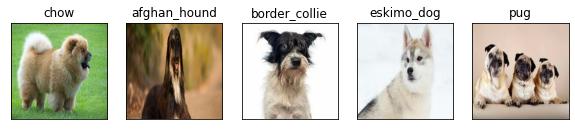

In [152]:
# check custom predictions
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
  plt.subplot(1,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)